# Reproducing Feldmann-Wustefel CDA Study (2018) Exp2 - G vs B

## Notes

In [1]:
import numpy as np
import glob
import pickle

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_brainvision

from scipy.io import loadmat

import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Feldmann-Wustefeld-2018/')
from events import get_specific_events, get_epochs, get_CDA, prep_report, fill_report, get_report, checksum

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prep Data

In [2]:
#==================================================================
# General Variables
#==================================================================
triggers = dict();

triggers['1+3_same'] = [111, 112] 
triggers['2+2_same'] = [121, 122]
triggers['3+1_same'] = [131, 132]
triggers['1+3_diff'] = [141, 142] 
triggers['2+2_diff'] = [151, 152]
triggers['3+1_diff'] = [161, 162]

triggers['right'] = [111, 121, 131, 141, 151, 161]
triggers['left'] = [112, 122, 132, 142, 152, 162]

triggers['all'] = [111, 121, 131, 141, 151, 161, 112, 122, 132, 142, 152, 162]

# Good & Bad in Behav file! (no hardware trigger)
# --------------------------

# Labels
conds = ['1+3_same', '2+2_same', '3+1_same', '1+3_diff', '2+2_diff', '3+1_diff']
sides = ['left', 'right']
perfs = ['good', 'bad']

# CDA Channels
chan_right = ['PO8']
chan_left = ['PO7']

# Epochs information
epoch_length = 3.5
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA main variable!
cda_dict = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
directory_path = '/Users/nick/Documents/PhD/CDA Datasets/Feldmann-Westefel 2018/AnalysisPipeline/Experiment2/'

for filepath in glob.iglob(directory_path + 'rawEEG/' + '*.vhdr'):
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')

    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_brainvision(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    preproc = raw

    # In their study they re-reference to average. I skipped it for now.

    # Filter
    preproc = preproc.filter(.1, 30., fir_design='firwin')
    
    events = mne.events_from_annotations(preproc)
    #preproc.plot(events=events, block=True, lowpass=40)

    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    #====================================
    # 1. Load Behav file to get ACC (accuracy: good/bad trials)
    # 2. Find 'clean' trials and sort them by triggers.
    # 3. Epochs
    # 4. Remove Baseline
    #====================================
    subject_str_idx = filename.rfind('.')
    subject_id = filename[subject_str_idx - 2: subject_str_idx]
    
    specific_events = get_specific_events(events[0], conds, sides, perfs, triggers, subject_id, experiment=2)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr)

    # ------------------------
    # 4. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    # ------------------------
    # 5. -- CDA --
    # ------------------------
    cda_dict[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)


# Add time points to CDA for later use.
times = epochs_dict['1+3_same']['left']['good'].times

# Print report
subreport = get_report(report, ['1+3_same', '2+2_same', '3+1_same', '1+3_diff', '2+2_diff', '3+1_diff'], ['left','right'], ['good', 'bad'], [])
report

Processing: Hudson2_0015.vhdr...
Extracting parameters from /Users/nick/Documents/PhD/CDA Datasets/Feldmann-Westefel 2018/AnalysisPipeline/Experiment2/rawEEG/Hudson2_0015.vhdr...
Setting channel info structure...
Reading 0 ... 5054619  =      0.000 ...  5054.619 secs...


/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
62 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 62 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
71 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 71 events and 3701 origina

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 1086 | Total Added: 1086 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 75 events and 3701 origi

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
61 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 61 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 3701 origina

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
63 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 63 events and 3701 origina

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
61 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 61 events and 3701 origina

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
56 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 56 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 3701 origina

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
59 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 59 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
56 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 56 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
63 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 63 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
63 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 63 events and 3701 origina

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
56 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 56 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 65 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
50 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 50 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
67 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 67 events and 3701 original time points ...

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
67 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 67 events and 3701 origina

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_1467/3658523155.py:51: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_brainvision(filepath, preload=True)


Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S 10', 'Stimulus/S 20', 'Stimulus/S 30', 'Stimulus/S 33', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 66', 'Stimulus/S 99', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S116', 'Stimulus/S117', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S126', 'Stimulus/S127', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S136', 'Stimulus/S137', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S146', 'Stimulus/S147', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S156', 'Stimulus/S157', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S166', 'Stimulus/S167']
Nb Trials: 960 | Total Added: 960 | Total Skipped: 0 
====================== EPOCHING ======================
tmin:-0.2, tmax:3.5, baseline=(-0.2, 0)
---------- 1+3_same-left-good -------------
Not setting metadata
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 3701 origina

,1+3_same,2+2_same,3+1_same,1+3_diff,2+2_diff,3+1_diff,left,right,good,bad,...,3+1_diff-left,3+1_diff-left-good,3+1_diff-good,3+1_diff-left-bad,3+1_diff-bad,3+1_diff-right,3+1_diff-right-good,3+1_diff-right-bad,checksum,notes
Hudson2_0015.vhdr,160,160,160,160,160,160,480,480,748,212,...,80,52,112,28,48,80,60,20,1,
Hudson2_0023.vhdr,160,160,160,160,160,160,480,480,858,102,...,80,71,137,9,23,80,66,14,1,
Hudson2_0019.vhdr,180,183,179,182,181,181,542,544,918,168,...,91,72,151,19,30,90,79,11,1,
Hudson2_0018.vhdr,160,160,160,160,160,160,480,480,816,144,...,80,65,127,15,33,80,62,18,1,
Hudson2_0022.vhdr,160,160,160,160,160,160,480,480,680,280,...,80,52,110,28,50,80,58,22,1,
Hudson2_0014.vhdr,160,160,160,160,160,160,480,480,755,205,...,80,69,128,11,32,80,59,21,1,
Hudson2_0025.vhdr,160,160,160,160,160,160,480,480,721,239,...,80,58,120,22,40,80,62,18,1,
Hudson2_0029.vhdr,160,160,160,160,160,160,480,480,737,223,...,80,59,122,21,38,80,63,17,1,
Hudson2_0013.vhdr,160,160,160,160,160,160,480,480,661,299,...,80,56,108,24,52,80,52,28,1,
Hudson2_0012.vhdr,160,160,160,160,160,160,480,480,774,186,...,80,64,133,16,27,80,69,11,1,


## Final CDA figure from Feldmann-Wustefel 2020
### Grand Average

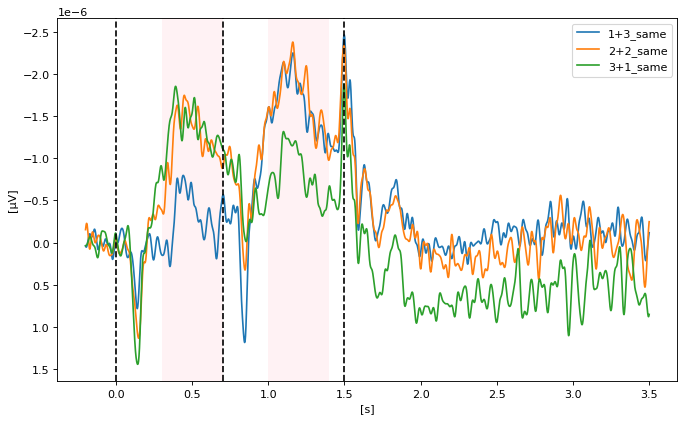

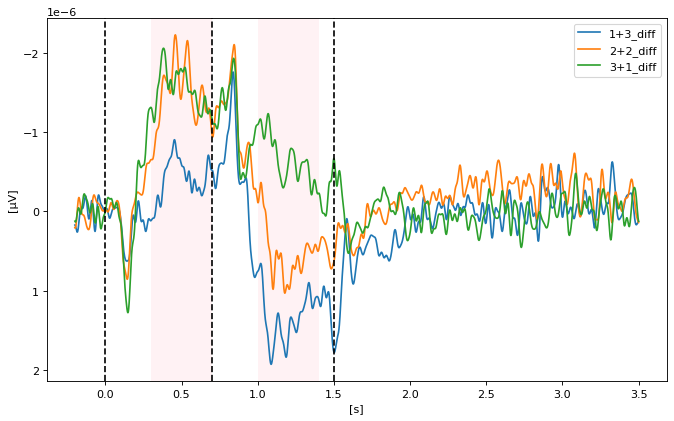

In [3]:
# 1. Get Grand Average CDA (across subjects)
cda_all = dict()
for cond in cda_dict[list(cda_dict.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict.keys():
        if len(cda_dict[f][cond]['left']['good']) > 0:
            cda_dict_cur = (cda_dict[f][cond]['left']['good'] + cda_dict[f][cond]['right']['good'])/2
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Trigger: {})".format(str(f), str(t)))
            
# 2. Plot Figure #1
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(times, cda_all['1+3_same'].mean(0), label='1+3_same')
plt.plot(times, cda_all['2+2_same'].mean(0), label='2+2_same')
plt.plot(times, cda_all['3+1_same'].mean(0), label='3+1_same')
plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=0.7, color='k', linestyle='--')
plt.axvline(x=1.5, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
plt.show()

# 2. Plot Figure #2
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(times, cda_all['1+3_diff'].mean(0), label='1+3_diff')
plt.plot(times, cda_all['2+2_diff'].mean(0), label='2+2_diff')
plt.plot(times, cda_all['3+1_diff'].mean(0), label='3+1_diff')
plt.axvspan(0.3, 0.7, facecolor='pink', edgecolor='none', alpha=.2)
plt.axvspan(1, 1.4, facecolor='pink', edgecolor='none', alpha=.2)
plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=0.7, color='k', linestyle='--')
plt.axvline(x=1.5, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
plt.show()

In [6]:
#====================================
# Save the whole CDA dict.
#====================================
cda_dict['times'] = times
with open("cda_feldmann2018_exp2_goodbad.pkl","wb") as f:
    pickle.dump(cda_dict, f)